In [1]:
# Code to mount to drive
import sys
from google.colab import drive
from pathlib import Path
drive.mount("/content/drive", force_remount=True)
base = Path('/content/drive/My Drive/Colab Notebooks')

Mounted at /content/drive


In [2]:
# Imports Libraries:

import glob # For handling paths
import os
import numpy as np 
from scipy import misc
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.utils import to_categorical

from keras.models import Model
from keras import optimizers

from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D
from keras.applications.resnet50 import ResNet50

IMAGE_PATH='/content/drive/My Drive/Colab Notebooks/imgs'

In [3]:
# Taking paths for loading the images:

food_items=os.listdir(IMAGE_PATH)
food_items.sort()
numfood = len(food_items)

In [4]:
images=[] # Creating an empty array for storing the images
labels=[] #Creating an empty array for iterations in the category
n=0
for food in food_items:
    for file_in_each_category in os.listdir(IMAGE_PATH+'/'+food):
        path=IMAGE_PATH+'/'+food+'/'+file_in_each_category
        im = Image.open(path) # Read Image from path
        r_im = cv2.resize(cv2.imread(path), (256,256), interpolation=cv2.INTER_AREA) # Resize the image
        r_im = cv2.cvtColor(r_im, cv2.COLOR_BGR2RGB) # Change image format from BGR to RGB
        images.append(r_im)
        labels.append(n)
    n=n+1

3

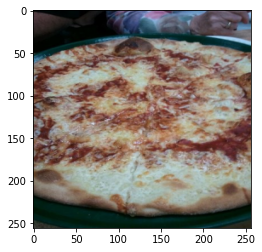

In [5]:
# Checking loaded image
first_test_image = images[1900]
plt.imshow(first_test_image.reshape(256,256,3))
labels[1900]

In [6]:
# Converting image and labels to numpy array
images = np.asarray(images)
print("Shape of one image:", images.shape)
n_images = images.shape[0]
labels = np.array(labels)
labels.shape

Shape of one image: (3000, 256, 256, 3)


(3000,)

In [7]:
# Normalising the data
images = images / 255

In [8]:
print("Shape of one image:", images[0].shape)

Shape of one image: (256, 256, 3)


In [9]:
# Spliting into Training & Testing:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [10]:
# Converting data to categorical
y_train = to_categorical(y_train, numfood)
y_test = to_categorical(y_test, numfood)

In [11]:
images=[]

In [12]:
# Model Creation
base_model = ResNet50(include_top=False, weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(numfood, activation='sigmoid')(x)

model1 = Model(inputs=base_model.input, outputs=predictions)

adam = optimizers.Adam(lr = 0.001)

model1.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [13]:
# Fitting the data onto the model
%%time
history = model1.fit(X_train, y_train, batch_size=50, epochs=50, validation_data=(X_test, y_test), shuffle=False, verbose = 1)

Epoch 1/50
48/48 [==============================] - 46s 703ms/step - loss: 0.4034 - accuracy: 0.6535 - val_loss: 15.3242 - val_accuracy: 0.1650
Epoch 2/50
48/48 [==============================] - 34s 720ms/step - loss: 0.1745 - accuracy: 0.8333 - val_loss: 23.3726 - val_accuracy: 0.3100
Epoch 3/50
48/48 [==============================] - 34s 703ms/step - loss: 0.1091 - accuracy: 0.8782 - val_loss: 21.5838 - val_accuracy: 0.3100
Epoch 4/50
48/48 [==============================] - 34s 706ms/step - loss: 0.0708 - accuracy: 0.9313 - val_loss: 4.8295 - val_accuracy: 0.1600
Epoch 5/50
48/48 [==============================] - 34s 711ms/step - loss: 0.0741 - accuracy: 0.9283 - val_loss: 12.1840 - val_accuracy: 0.1967
Epoch 6/50
48/48 [==============================] - 34s 705ms/step - loss: 0.0664 - accuracy: 0.9359 - val_loss: 15.2361 - val_accuracy: 0.1600
Epoch 7/50
48/48 [==============================] - 34s 713ms/step - loss: 0.0440 - accuracy: 0.9620 - val_loss: 3.0049 - val_accuracy: 0

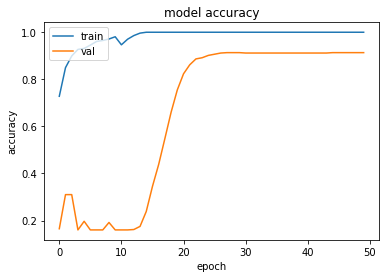

In [14]:
# Plot between no. of epochs and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
# evaluatiion of model
result=model1.evaluate(X_test, y_test)

19/19 [==============================] - 4s 150ms/step - loss: 0.1824 - accuracy: 0.9133


In [16]:
print('Test accuracy: ', result[1])

Test accuracy:  0.9133333563804626


In [17]:
food_items

['chicken_wings', 'dumplings', 'ice_cream', 'pizza', 'sushi']

array([3])

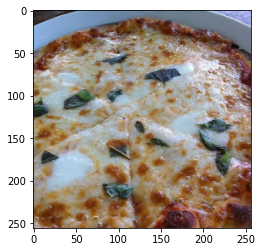

In [18]:
# Prediction for an image
n=150
first_test_image = X_test[n, :]
plt.imshow(first_test_image.reshape(256,256,3), cmap=plt.cm.Greys)
np.argmax(model1.predict(X_test[[n], :]), axis=-1)

In [ ]:
# Saving the model
model1.save('/content/drive/My Drive/Colab Notebooks/model1')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/model1/assets
